STAT 453: Deep Learning (Spring 2020)    
Instructor: Sebastian Raschka (sraschka@wisc.edu)  

Course website: http://pages.stat.wisc.edu/~sraschka/teaching/stat453-ss2020/   
GitHub repository: https://github.com/rasbt/stat453-deep-learning-ss20

---

# Notebook for Preparing the Dataset for HW3

## Step 1: Downloading the essential files

Download all the necessary files listed in this table **and put them into the folder where this Jupyter notebook is located**:
    
    
| Name  | Content | Examples | Size | Link |
| --- | --- |--- | --- |--- |
| `train-images-idx3-ubyte.gz`  | training set images  | 60,000|26 MBytes | [Download](http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz)|
| `train-labels-idx1-ubyte.gz`  | training set labels  |60,000|29 KBytes | [Download](http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz)|
| `t10k-images-idx3-ubyte.gz`  | test set images  | 10,000|4.3 MBytes | [Download](http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-images-idx3-ubyte.gz)|
| `t10k-labels-idx1-ubyte.gz`  | test set labels  | 10,000| 5.1 KBytes | [Download](http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-labels-idx1-ubyte.gz)|
    
    

## Step 2: Unzipping

Next, run this code cell to unzip the .gz files.

In [1]:
# this code cell unzips the .gz files

import sys
import gzip
import shutil
import os

writemode = 'wb'
zipped_mnist = [f for f in os.listdir() if f.endswith('ubyte.gz')]
for z in zipped_mnist:
    with gzip.GzipFile(z, mode='rb') as decompressed, open(z[:-3], writemode) as outfile:
        outfile.write(decompressed.read())

## Step 3: Loading the files

Next, load the images into NumPy arrays by executing the following function:

In [3]:
import os
import struct
import numpy as np
 
def load_mnist(path, kind='train'):
    """Load data from `path`"""
    labels_path = os.path.join(path, 
                               '%s-labels-idx1-ubyte' % kind)
    images_path = os.path.join(path, 
                               '%s-images-idx3-ubyte' % kind)
        
    with open(labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II', 
                                 lbpath.read(8))
        labels = np.fromfile(lbpath, 
                             dtype=np.uint8)

    with open(images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack(">IIII", 
                                               imgpath.read(16))
        images = np.fromfile(imgpath, 
                             dtype=np.uint8).reshape(len(labels), 784)
 
    return images, labels


X_train, y_train = load_mnist('', kind='train')
print('Rows: %d, columns: %d' % (X_train.shape[0], X_train.shape[1]))

X_test, y_test = load_mnist('', kind='t10k')
print('Rows: %d, columns: %d' % (X_test.shape[0], X_test.shape[1]))

Rows: 60000, columns: 784
Rows: 10000, columns: 784


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

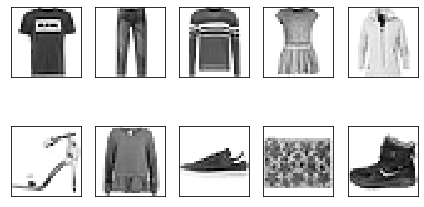

In [5]:
fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()
for i in range(10):
    img = X_train[y_train == i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
# plt.savefig('images/12_5.png', dpi=300)
plt.show()

## Step 4: Saving the images as PNG files

This section will create PNG images from the NumPy arrays.

In [6]:
from PIL import Image

In [8]:
if not os.path.exists('png-files'):
    os.mkdir('png-files')

for idx,row in enumerate(X_train):
    file_name = f"{idx}.png"
    file_path = os.path.join('png-files', file_name)
    im = Image.fromarray(row.reshape(28, 28))
    im.save(file_path)    

In [9]:
for idx,row in enumerate(X_test):
    file_name = f"{X_train.shape[0] + idx}.png"
    file_path = os.path.join('png-files', file_name)
    im = Image.fromarray(row.reshape(28, 28))
    im.save(file_path)

After executing the previous code, you should have 70k images in the `png-files` directory (60k training images and 10k test images).

In [11]:
len(os.listdir('png-files'))

70000

## Step: Creating CSV files with class labels

Lastly, we are going to create CSV files that contain the image file paths with the images' corresponding class labels.

In [27]:
import pandas as pd

In [28]:
df_train = pd.DataFrame(y_train, columns=['class_label'])
df_train['image_name'] = [f"{idx}.png" for idx in range(y_train.shape[0])]
df_train.head()

,class_label,image_name
0,9,0.png
1,0,1.png
2,0,2.png
3,3,3.png
4,0,4.png


In [29]:
df_shuffled = df_train.sample(n=df_train.shape[0], random_state=123)

In [30]:
df_trainset = df_shuffled.iloc[:55000]
df_validset = df_shuffled.iloc[55000:]

In [31]:
df_testset = pd.DataFrame(y_test, columns=['class_label'])
df_testset['image_name'] = [f"{X_train.shape[0]+idx}.png" for idx in range(y_test.shape[0])]
df_testset.head()

,class_label,image_name
0,9,60000.png
1,2,60001.png
2,1,60002.png
3,1,60003.png
4,6,60004.png


In [32]:
df_trainset.to_csv('train.csv', index=None)
df_validset.to_csv('valid.csv', index=None)
df_testset.to_csv('test.csv', index=None)